# Geographic analysis of Lagos Housing Market

**Role:** Geographic Analyst  
**Objective:** Clean and analyze location data to understand market activity, vacancy, and exclusivity.  
**Locations:** Lekki Phase 1, Ikate, Ikoyi, Old Ikoyi, Banana Island, Victoria Island, Oniru, Ajah, Yaba, Elegushi, Agungi, Chevron, Ajah, Sangotedo, Badore, Abaraham Adesanya, Ibeju Lekki, Epe,

### Importing Libraries
 I am importing libraries that would be used accross the code

In [234]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Loading Dataset
I am loading and previewing the Merged Dataset

In [235]:
df = pd.read_csv("./data/Merged_dataset.csv")
df

,Title,Location,Price,Bedrooms,Bathrooms,Toilets,Property Type,URL
0,Fully Serviced 3-bedroom Apartment With Study ...,"Old Ikoyi, Ikoyi, Lagos","₦40,000,000 per annum",3,3,4,3 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
1,Top Rated Luxury 2 Bedroom Penthouse Apartment...,"Old Ikoyi Lagos, Ikoyi, Lagos","$40,000 per annum \napprox. ₦56,842,415",2,2,3,2 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
2,Luxury 3 Bedroom Apartment,"Ikoyi, Lagos","₦35,000,000 per annum",3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...
3,Luxury 3 Bedroom Apartment 4th Floor,"Banana Island, Ikoyi, Lagos","₦45,000,000 per annum",3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...
4,Well Maintained Luxury 4 Bedroom Apartment,"Buena Vista, Banana Island, Ikoyi, Lagos","₦55,000,000 per annum",4,4,5,4 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
...,...,...,...,...,...,...,...,...
13678,4 Bedroom Terraced Duplex With Bq,"Lekki Gardens, Ajah, Lagos","₦ 120,000,000",4 Bedrooms,4 Bathrooms,5 Toilets,4 bedroom detached duplex for sale,https://nigeriapropertycentre.com/for-sale/hou...
13679,2 Plots Out Of My Land,"Abraham Adesanya, Ajah, Lagos","₦ 100,000,000",NaN,NaN,NaN,Land for sale,https://nigeriapropertycentre.com/for-sale/lan...
13680,2 Plots Of Land Size Measuring 1250sqm,"By Abraham Adesanya, Ajah, Lagos","₦ 240,000,000","1,250 sqm Total Area",NaN,NaN,Land for sale,https://nigeriapropertycentre.com/for-sale/lan...
13681,Plots Of Land,"Lakowe, Ajah, Ibeju Lekki, Lagos","₦ 15,000,000",500 sqm Total Area,NaN,NaN,Mixed-use land for sale,https://nigeriapropertycentre.com/for-sale/lan...


In [236]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 13683 entries, 0 to 13682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Title          13681 non-null  str  
 1   Location       13681 non-null  str  
 2   Price          13683 non-null  str  
 3   Bedrooms       13516 non-null  str  
 4   Bathrooms      12806 non-null  str  
 5   Toilets        12865 non-null  str  
 6   Property Type  13681 non-null  str  
 7   URL            13681 non-null  str  
dtypes: str(8)
memory usage: 855.3 KB


### Checking for 10 samples of Locations and Price before cleaning

In [237]:
df[['Location', 'Price']].sample(10)

,Location,Price
10529,"Royal Garden Estate, Before Abraham Adesanya R...","₦ 455,000,000"
7671,"Lekki Phase 1, Lekki, Lagos","₦16,000,000per annum"
10695,"Ajah, Lagos","₦ 85,000,000"
5882,"Ikota, Lekki, Lagos","₦15,000,000per annum"
12546,"Ajah, Lagos","₦ 290,000,000"
1739,"Off Mobolaji Johnson Avenue, Old Ikoyi, Ikoyi,...","₦100,000,000 per annum"
12029,"Ajah, Lekki, Lagos","₦ 290,000,000"
7476,"Lekki Phase 1, Lekki, Lagos","₦35,000,000per annum"
7888,"Lekki Phase 1, Lekki Phase 1, Lekki, Lagos","₦18,000,000per annum"
4958,"Ikate, Lekki, Lagos","₦9,000,000per annum"


### Removing Datas with 0 or NAN Bathrooms, Bedrooms or Toilets

In [238]:
df[['Bedrooms', 'Bathrooms', 'Toilets']].info()

<class 'pandas.DataFrame'>
RangeIndex: 13683 entries, 0 to 13682
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Bedrooms   13516 non-null  str  
 1   Bathrooms  12806 non-null  str  
 2   Toilets    12865 non-null  str  
dtypes: str(3)
memory usage: 320.8 KB


In [239]:
df['Bedrooms'] = (df['Bedrooms'].str.replace(r'[^\d]', '', regex=True).replace('', pd.NA).astype('Int64'))
df['Bathrooms'] = (df['Bathrooms'].str.replace(r'[^\d]', '', regex=True).replace('', pd.NA).astype('Int64'))
df['Toilets'] = (df['Toilets'].str.replace(r'[^\d]', '', regex=True).replace('', pd.NA).astype('Int64'))
df = df[~(df["Bedrooms"]==0)]
df = df[~(df["Bathrooms"]==0)]
df = df[~(df["Toilets"]==0)]
df = df.dropna(subset=['Bedrooms', 'Bathrooms', 'Toilets'])
df[['Bedrooms', 'Bathrooms', 'Toilets']].info()

<class 'pandas.DataFrame'>
Index: 10894 entries, 0 to 13682
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Bedrooms   10894 non-null  Int64
 1   Bathrooms  10894 non-null  Int64
 2   Toilets    10894 non-null  Int64
dtypes: Int64(3)
memory usage: 372.4 KB


### Converting prices, bedrooms, bathrooms and toilets to integers

- convert prices, bedrooms, bathrooms and toilets to integers
- making it annual price

In [240]:
df = df[df['Price'].str.startswith('₦')].copy()
df['numeric_val'] = (
    df['Price']
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', pd.NA)
    .astype('Int64')
)
df = df.dropna(subset=['numeric_val'])

def normalize_price(row):
    price = row['numeric_val']
    text = row['Price']
    
    if 'month' in text:
        return price * 12
    elif 'annum' in text or 'year' in text:
        return price
    else:
        return price
df['Price'] = df.apply(normalize_price, axis=1)
df = df.drop('numeric_val', axis=1)
df = df[df['Price'] > 0]
df['Price']


0         40000000
2         35000000
3         45000000
4         55000000
5         40000000
           ...    
13674     75000000
13675     65000000
13677     85000000
13678    120000000
13682    250000000
Name: Price, Length: 10769, dtype: int64

### Creating Neigbourhood for a set of locations

In [241]:
neighborhoods = [
    "Ogba",
    "Ikorodu",
    "Omole",
    "Ogudu",
    "Isheri",
    "Allen",
    "Magodo",
    "Ikeja",
    "Banana Island",
    "Old Ikoyi",
    "Ikoyi",
    "Victoria Island",
    "Lekki Phase 1",
    "Lekki Phase 2",
    "Ikate",
    "Oniru",
    "Elegushi",
    "Agungi",
    "Chevron",
    "Osapa",
    "Orchid",
    "Jakande",
    "Igbo Efon",
    "Ikota",
    "Ologolo",
    "VGC",
    "Abijo GRA",
    "Ajah",
    "Sangotedo",
    "Badore",
    "Abraham Adesanya",
    "Idado",
    "Ilasan",
    "Oral Estate",
    "Chevy View Estate",
    "Lekki",
    "Ibeju Lekki",
    "Epe",
    "Yaba"
]

neighborhoods = sorted(list(set(neighborhoods)), key=len, reverse=True)

def extract_submarket(location):
    loc = str(location).lower()
    for n in neighborhoods:
        if re.search(rf'\b{re.escape(n.lower())}\b', loc):
            return n
    return "Other"

df['Location'] = df['Location'].apply(extract_submarket)

df[['Location']].sample(10)


,Location
1564,Banana Island
295,Victoria Island
10183,Ikota
5204,Lekki
1488,Victoria Island
9265,Ajah
5849,Lekki Phase 1
13089,Ajah
12259,Ologolo
13046,Ajah


In [242]:
df['Location'].value_counts()

Location
Ajah                 2509
Lekki                1809
Lekki Phase 1        1764
Victoria Island      1129
Banana Island         793
Ikoyi                 518
Sangotedo             453
Old Ikoyi             281
Abraham Adesanya      253
Ikota                 206
Agungi                193
Badore                161
Orchid                159
Chevron               137
Lekki Phase 2         107
Ologolo               100
Elegushi               62
Ilasan                 31
Ikeja                  22
Oral Estate            21
Ibeju Lekki            17
Igbo Efon              15
Abijo GRA               8
Jakande                 5
Chevy View Estate       5
Magodo                  5
Ikorodu                 3
Isheri                  2
Ogudu                   1
Name: count, dtype: int64

### View cleaned data

In [243]:
df

,Title,Location,Price,Bedrooms,Bathrooms,Toilets,Property Type,URL
0,Fully Serviced 3-bedroom Apartment With Study ...,Old Ikoyi,40000000,3,3,4,3 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
2,Luxury 3 Bedroom Apartment,Ikoyi,35000000,3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...
3,Luxury 3 Bedroom Apartment 4th Floor,Banana Island,45000000,3,4,4,3 bedroom house for rent,https://nigeriapropertycentre.com/for-rent/hou...
4,Well Maintained Luxury 4 Bedroom Apartment,Banana Island,55000000,4,4,5,4 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
5,Newly Built Three Bedroom Penthouse,Ikoyi,40000000,3,3,4,3 bedroom flat / apartment for rent,https://nigeriapropertycentre.com/for-rent/fla...
...,...,...,...,...,...,...,...,...
13674,3-bedroom Terrace Duplex,Ajah,75000000,3,3,4,3 bedroom terraced duplex for sale,https://nigeriapropertycentre.com/for-sale/hou...
13675,4-bedroom Terrace Duplex Corner Piece,Lekki,65000000,4,4,5,4 bedroom terraced duplex for sale,https://nigeriapropertycentre.com/for-sale/hou...
13677,3-bedroom Terrace Duplex With A Bq,Ajah,85000000,3,3,4,3 bedroom terraced duplex for sale,https://nigeriapropertycentre.com/for-sale/hou...
13678,4 Bedroom Terraced Duplex With Bq,Lekki,120000000,4,4,5,4 bedroom detached duplex for sale,https://nigeriapropertycentre.com/for-sale/hou...


### Checking Data after cleaning

In [244]:
df.info()

<class 'pandas.DataFrame'>
Index: 10769 entries, 0 to 13682
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Title          10769 non-null  str  
 1   Location       10769 non-null  str  
 2   Price          10769 non-null  int64
 3   Bedrooms       10769 non-null  Int64
 4   Bathrooms      10769 non-null  Int64
 5   Toilets        10769 non-null  Int64
 6   Property Type  10769 non-null  str  
 7   URL            10769 non-null  str  
dtypes: Int64(3), int64(1), str(4)
memory usage: 788.7 KB


### Adding the cleaned Data set

In [246]:
df.to_csv("./data/Cleaned_geographic_dataset.csv", index=False)

## Analysis Begins

### Top 10 Busiest Locations
A bar chart showing which areas have the highest volume of
listings.

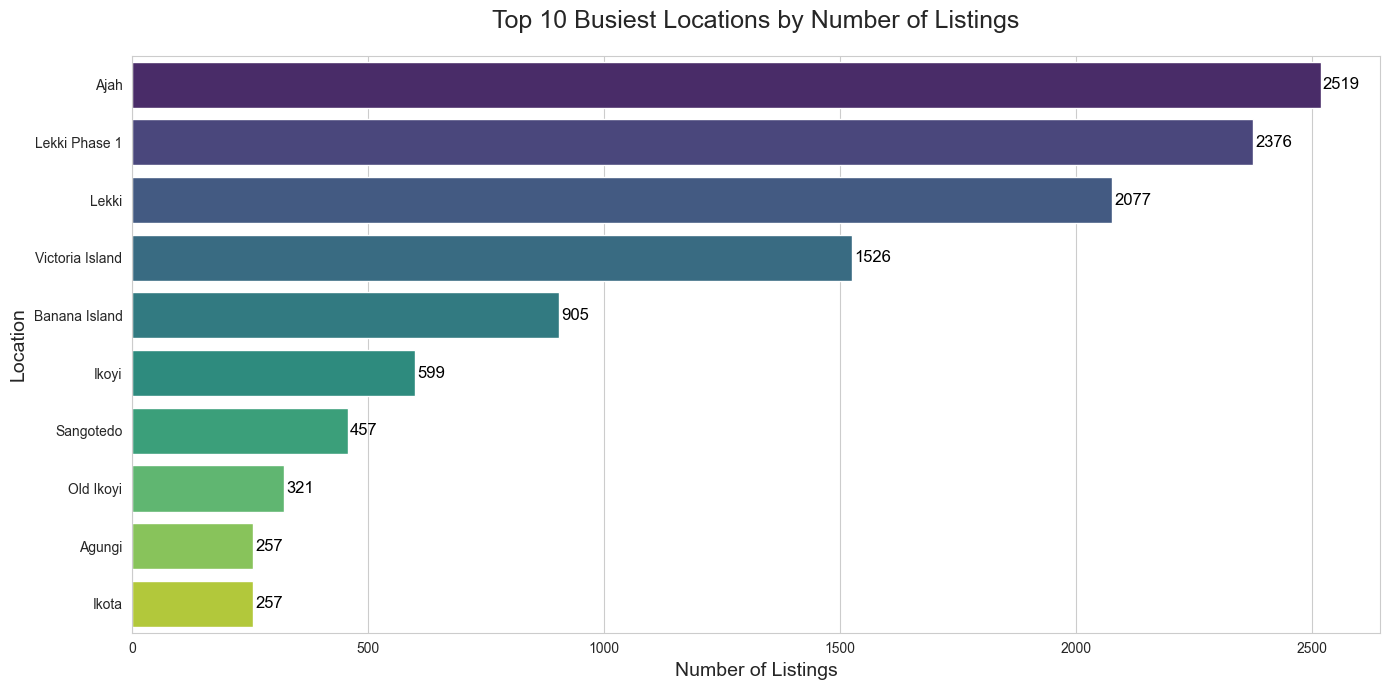

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
top10 = df['Location'].value_counts().head(10)

plt.figure(figsize=(14,7))
sns.barplot(
    x=top10.values,
    y=top10.index,
    palette=sns.color_palette("viridis", len(top10)),
    dodge=False,
    legend=False,
    hue=top10.index
)
plt.title("Top 10 Busiest Locations by Number of Listings", fontsize=18, pad=20)
plt.xlabel("Number of Listings", fontsize=14)
plt.ylabel("Location", fontsize=14)
for i, v in enumerate(top10.values):
    plt.text(v + 5, i, str(v), color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()

### The "Exclusivity" Chart
A bar chart showing the location with the highest minimum entry
price (e.g., "You cannot find a house in Ikoyi for less than X)

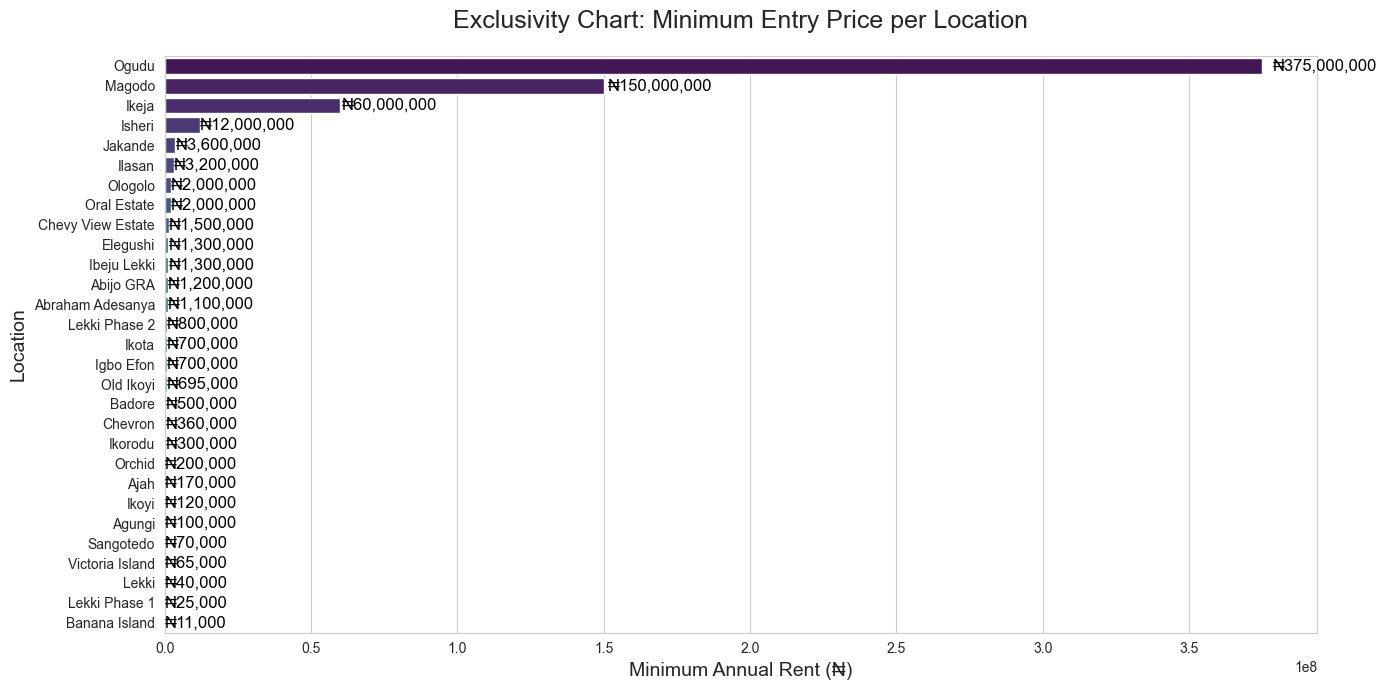

In [ ]:
min_rent = df.groupby('Location')['Price'].min().sort_values(ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(
    x=min_rent.values, 
    y=min_rent.index, 
    palette=sns.color_palette("viridis", len(min_rent)),
    dodge=False,
    legend=False,
    hue=min_rent.index
)
plt.title("Exclusivity Chart: Minimum Entry Price per Location", fontsize=18, pad=20)
plt.xlabel("Minimum Annual Rent (₦)", fontsize=14)
plt.ylabel("Location", fontsize=14)
for i, v in enumerate(min_rent.values):
    plt.text(v + 0.01*v, i, f"₦{v:,}", color='black', va='center', fontsize=12)
plt.tight_layout()
plt.show()